<a href="https://colab.research.google.com/github/anuragmishra218/ETL_Visualization_Prediction_Python/blob/master/ejam_Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Importing all the libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Setting figure size
sns.set(rc={'figure.figsize':(15,10)})

In [36]:
# Extraction Process from csv to pandas dataframe
df = pd.read_csv("price_train.csv")
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.61,-122.34,4,2.00,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.64,-122.36,1,1.00,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.55,-122.27,2,1.00,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.60,-122.31,1,1.00,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.55,-122.29,6,2.50,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [37]:
# function to print and calculate total amenities


def total_amenities(x):
  total_amen = []
  for i in x:
    z = i.replace('{' , '')
    z = z.replace('}' , '')
    z = z.replace('"' , '').split(',')
    for j in z:
      if j not in total_amen:
        total_amen.append(j)
        print(j)

  print(len(total_amen))


total_amenities(df['amenities'])

TV
Internet
Wifi
Kitchen
Elevator
Heating
Family/kid friendly
Washer
Dryer
Smoke detector
Carbon monoxide detector
First aid kit
Safety card
Fire extinguisher
Essentials
Shampoo
Hangers
Hair dryer
Iron
Laptop friendly workspace
Self check-in
Smart lock
Keypad
Private living room
Cable TV
Air conditioning
Pets live on this property
Free street parking
Indoor fireplace
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Private entrance
Hot water
Bed linens
Microwave
Coffee maker
Refrigerator
Dishwasher
Dishes and silverware
Cooking basics
Oven
Stove
Luggage dropoff allowed
Full kitchen
Room-darkening shades
Patio or balcony
Lock on bedroom door
Other
Free parking on premises
Smoking allowed
Breakfast
Hot tub
Suitable for events
24-hour check-in
Extra pillows and blankets
Garden or backyard
Wide doorway
Wide entryway
Handheld shower head
Buzzer/wireless intercom
Pack ’n Play/travel crib
Pool
Pets allowed
Gym
Single level home
BBQ grill
Long term stays al

In [38]:
# Univariate Analysis of each column to get to know dataset more clearly
# function to present the count plot graph
def CountPlot(x,df,xl='x-axis',yl='Total Count',title='Countplot',z=0):
  length = len(df)
  g=sns.countplot(x=x,data=df)
  for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 20,'{:1.2f}%'.format(height/length*100),ha="center") 
  g.set(xlabel=xl, ylabel=yl, title=title)
  plt.xticks(rotation=z)
  plt.show()

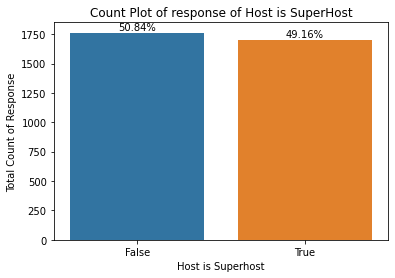

In [39]:
# Visualizing countplot of column 'host_is_superhost'
CountPlot('host_is_superhost',df,'Host is Superhost','Total Count of Response','Count Plot of response of Host is SuperHost')

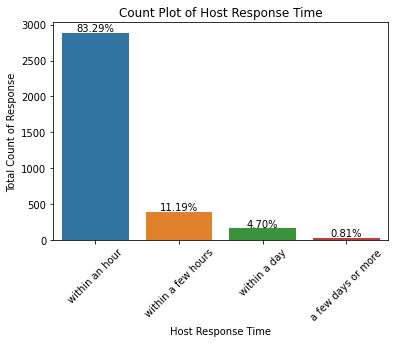

In [40]:
# Visualizing countplot of column 'host_response_time'
CountPlot('host_response_time',df,'Host Response Time','Total Count of Response','Count Plot of Host Response Time',45)

In [41]:
# Now creating ETL pipline class which will Extract the csv data, transform into required format and then save the new dataset as csv.
class ETL:
  def __init__(self, Path,Train=True):
    self.df = pd.read_csv(Path)
    self.Train = Train
    self.Transform()
  
  # Method to Transform the data into required format

  def Transform(self):
    # Deleting X1 and id columns as they both are for identification 
    self.df = self.df.drop(['X1','id'],axis=1)

    # Function to Convert the boolean values into Numerical values
    def bool_to_num(x):
      if x==True:
        return 1
      else:
        return 0

    # Applying the bool_to_num function on 'host_is_superhost','host_identity_verified' and 'instant_bookable'
    self.df['host_is_superhost'] = self.df['host_is_superhost'].apply(bool_to_num)
    self.df['host_identity_verified'] = self.df['host_identity_verified'].apply(bool_to_num)
    self.df['instant_bookable'] = self.df['instant_bookable'].apply(bool_to_num)

    # Function to split the number and % and convert it into numerical values
    def percentage_to_num(x):
      return int(x.split('%')[0])

    # Applying the string_to_num function on 'host_response_rate'
    self.df['host_response_rate'] = self.df['host_response_rate'].apply(percentage_to_num)

    # Function to split the number and $ and convert it into numerical values
    def dollar_to_num(x):
      if x == '0':
        return float(x)
      else:
        try:
          return float(x.split('$')[1])
        except:
          return float(x.replace(',' , '').split('$')[1])

    
    # Applying the string_to_num function on 'cleaning_fee' and 'price'
    self.df['cleaning_fee'] = self.df['cleaning_fee'].apply(dollar_to_num)
    if self.Train:
      self.df['price'] = self.df['price'].apply(dollar_to_num)

    # creating instance of labelencoder
    labelencoder = LabelEncoder()

    # Assigning numerical values and storing in same column (host_response_time, neighbourhood_group_cleansed, property_type, room_type, bed_type, cancellation_policy)
    label_encoding_cols = ['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
    for i in label_encoding_cols:
      self.df[i] = labelencoder.fit_transform(self.df[i])


    # As there are total 178 amenities, we are creating a column in which total amenities of that entry is present.
    # Function to convert amenities column into total amenities present for that entry
    def total_amenities(x):
      total = 0
      z = x.replace('{' , '')
      z = z.replace('}' , '')
      z = z.replace('"' , '').split(',')
      for j in z:
        total = total + 1
      return total

    
    # Applying the total_amenities function on 'amenities'
    self.df['amenities'] = self.df['amenities'].apply(total_amenities)
        

      

  # Function to print and save transformed data
  def Load(self):
    self.df.to_csv("Transformed_Data.csv")
    return self.df



In [42]:
etl = ETL("price_train.csv")

In [43]:
data = etl.Load()
data.head(10)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,0,99,3,521,0,5,6,1,0,47.61,-122.34,4,2.00,2,2,3,24,129.00,2,1125,1,2,279.00
1,1,100,3,1,1,2,12,14,0,47.64,-122.36,1,1.00,0,1,3,39,50.00,2,30,1,1,99.00
2,1,100,3,1,0,4,13,11,0,47.55,-122.27,2,1.00,1,2,3,32,25.00,2,28,0,1,75.00
3,1,90,2,1,1,2,4,14,1,47.60,-122.31,1,1.00,1,1,3,17,0.00,2,30,0,0,70.00
4,1,100,3,4,1,8,1,14,0,47.55,-122.29,6,2.50,3,3,3,30,99.00,2,12,0,0,242.00
5,0,100,2,4,1,8,9,23,0,47.65,-122.38,6,3.50,3,3,3,19,100.00,2,1125,0,3,430.00
6,1,100,3,1,0,3,11,5,1,47.68,-122.37,2,1.00,1,2,3,33,20.00,1,8,0,1,60.00
7,0,100,3,9,0,4,6,8,0,47.61,-122.33,2,1.00,1,2,3,30,50.00,3,1125,1,3,125.00
8,1,100,3,2,0,2,6,1,0,47.61,-122.34,2,1.00,1,1,3,46,110.00,1,1125,1,3,225.00
9,0,99,3,152,0,2,6,17,0,47.61,-122.32,1,1.50,1,1,3,23,89.00,2,1125,0,3,219.00


In [44]:
# Installing lazy predict on google collab. As lazy predict gives rough idea of the models and their respective accuracies. 
!pip install lazypredict

In [45]:
# Importing required libararies to train the model

import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [46]:
# First we are splitting the dataset into X and Y where X are the all columns except 'Price' and Y is 'Price' column
X = data.drop(['price'],axis=1)
X.head(10)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,0,99,3,521,0,5,6,1,0,47.61,-122.34,4,2.00,2,2,3,24,129.00,2,1125,1,2
1,1,100,3,1,1,2,12,14,0,47.64,-122.36,1,1.00,0,1,3,39,50.00,2,30,1,1
2,1,100,3,1,0,4,13,11,0,47.55,-122.27,2,1.00,1,2,3,32,25.00,2,28,0,1
3,1,90,2,1,1,2,4,14,1,47.60,-122.31,1,1.00,1,1,3,17,0.00,2,30,0,0
4,1,100,3,4,1,8,1,14,0,47.55,-122.29,6,2.50,3,3,3,30,99.00,2,12,0,0
5,0,100,2,4,1,8,9,23,0,47.65,-122.38,6,3.50,3,3,3,19,100.00,2,1125,0,3
6,1,100,3,1,0,3,11,5,1,47.68,-122.37,2,1.00,1,2,3,33,20.00,1,8,0,1
7,0,100,3,9,0,4,6,8,0,47.61,-122.33,2,1.00,1,2,3,30,50.00,3,1125,1,3
8,1,100,3,2,0,2,6,1,0,47.61,-122.34,2,1.00,1,1,3,46,110.00,1,1125,1,3
9,0,99,3,152,0,2,6,17,0,47.61,-122.32,1,1.50,1,1,3,23,89.00,2,1125,0,3


In [47]:
Y = data['price'].copy()
Y.head(10)

0   279.00
1    99.00
2    75.00
3    70.00
4   242.00
5   430.00
6    60.00
7   125.00
8   225.00
9   219.00
Name: price, dtype: float64

In [48]:
# Now Function to Standardized the dataframe
def Standard_convert(X):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_standard = scaler.fit_transform(X)
  X_new = pd.DataFrame(X_standard,columns=X.columns)
  return X_new

X_new = Standard_convert(X)
X_new.head(10)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,-0.98,0.10,0.41,2.14,-0.92,0.51,-0.30,-1.20,-0.53,-0.29,-0.13,1.03,1.01,0.59,0.01,0.11,-0.43,1.02,-0.13,1.00,0.84,0.27
1,1.02,0.20,0.41,-0.32,1.08,-0.72,0.99,0.60,-0.53,0.34,-0.68,-0.61,-0.47,-1.31,-0.63,0.11,0.94,-0.34,-0.13,-1.07,0.84,-0.55
2,1.02,0.20,0.41,-0.32,-0.92,0.10,1.20,0.19,-0.53,-1.69,1.91,-0.06,-0.47,-0.36,0.01,0.11,0.30,-0.76,-0.13,-1.07,-1.19,-0.55
3,1.02,-0.79,-1.36,-0.32,1.08,-0.72,-0.73,0.60,1.52,-0.52,0.83,-0.61,-0.47,-0.36,-0.63,0.11,-1.07,-1.19,-0.13,-1.07,-1.19,-1.37
4,1.02,0.20,0.41,-0.30,1.08,1.73,-1.37,0.60,-0.53,-1.62,1.29,2.12,1.76,1.54,0.65,0.11,0.12,0.50,-0.13,-1.10,-1.19,-1.37
5,-0.98,0.20,-1.36,-0.30,1.08,1.73,0.35,1.85,-0.53,0.54,-1.56,2.12,3.24,1.54,0.65,0.11,-0.89,0.52,-0.13,1.00,-1.19,1.09
6,1.02,0.20,0.41,-0.32,-0.92,-0.31,0.77,-0.64,1.52,1.18,-0.99,-0.06,-0.47,-0.36,0.01,0.11,0.39,-0.85,-0.22,-1.11,-1.19,-0.55
7,-0.98,0.20,0.41,-0.28,-0.92,0.10,-0.30,-0.23,-0.53,-0.28,0.16,-0.06,-0.47,-0.36,0.01,0.11,0.12,-0.34,-0.03,1.00,0.84,1.09
8,1.02,0.20,0.41,-0.31,-0.92,-0.72,-0.30,-1.20,-0.53,-0.42,-0.18,-0.06,-0.47,-0.36,-0.63,0.11,1.58,0.69,-0.22,1.00,0.84,1.09
9,-0.98,0.10,0.41,0.40,-0.92,-0.72,-0.30,1.02,-0.53,-0.29,0.43,-0.61,0.27,-0.36,-0.63,0.11,-0.52,0.33,-0.13,1.00,-1.19,1.09


In [49]:
# Now splitting the data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 420)

In [66]:
# Now applying Lazy Predict
reg = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None, predictions=True)
models,pred = reg.fit(X_train, X_test, y_train, y_test)

 90%|████████▉ | 35/39 [00:12<00:01,  2.22it/s]

[20:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 39/39 [00:12<00:00,  3.07it/s]


In [67]:
models = models[0:-1]
models = models.reset_index()
models

,Model,R-Squared,RMSE,Time Taken
0,RandomForestRegressor,0.75,71.68,1.88
1,ExtraTreesRegressor,0.74,72.04,1.26
2,BaggingRegressor,0.74,72.04,0.21
3,XGBRegressor,0.74,72.39,0.26
4,GradientBoostingRegressor,0.74,72.96,0.57
5,LGBMRegressor,0.73,74.04,0.17
6,HistGradientBoostingRegressor,0.73,74.44,0.63
7,KNeighborsRegressor,0.69,79.01,0.19
8,MLPRegressor,0.59,90.78,2.97
9,HuberRegressor,0.53,98.08,0.07


In [82]:
# Function to print Bar plot
def BarPlot(x,y,df,xl='x-axis',yl='y-aixs',title='Barplot',z=0):
  length = len(df)
  g=sns.barplot(x = x, y = y, data = df,
            palette = 'hls') 
  g.set(xlabel=xl, ylabel=yl, title=title)
  plt.xticks(rotation=z)
  plt.show()

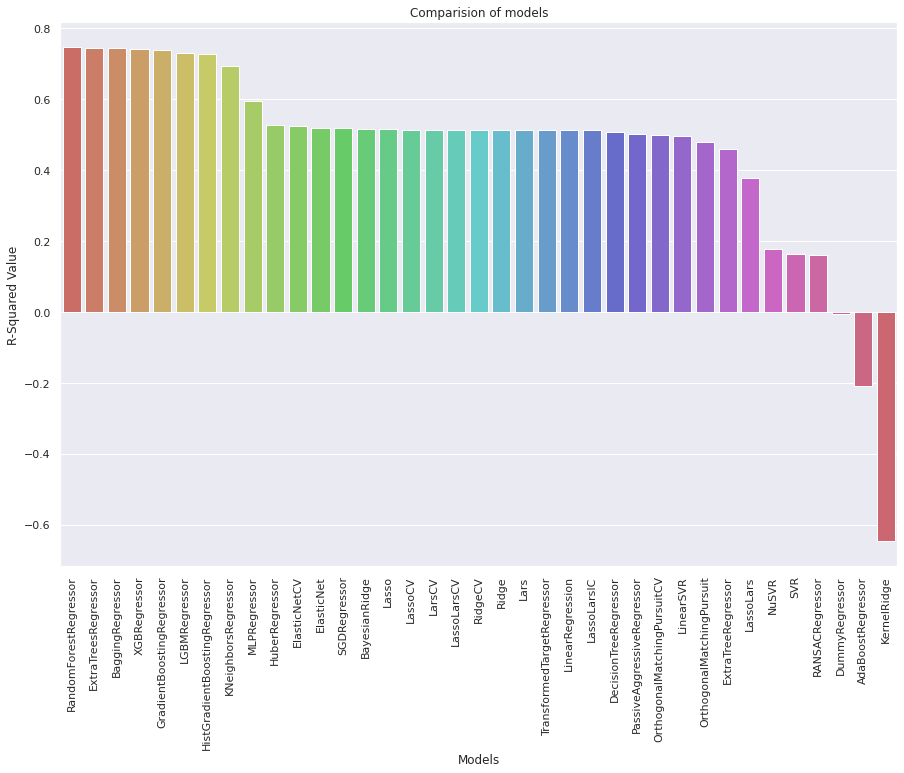

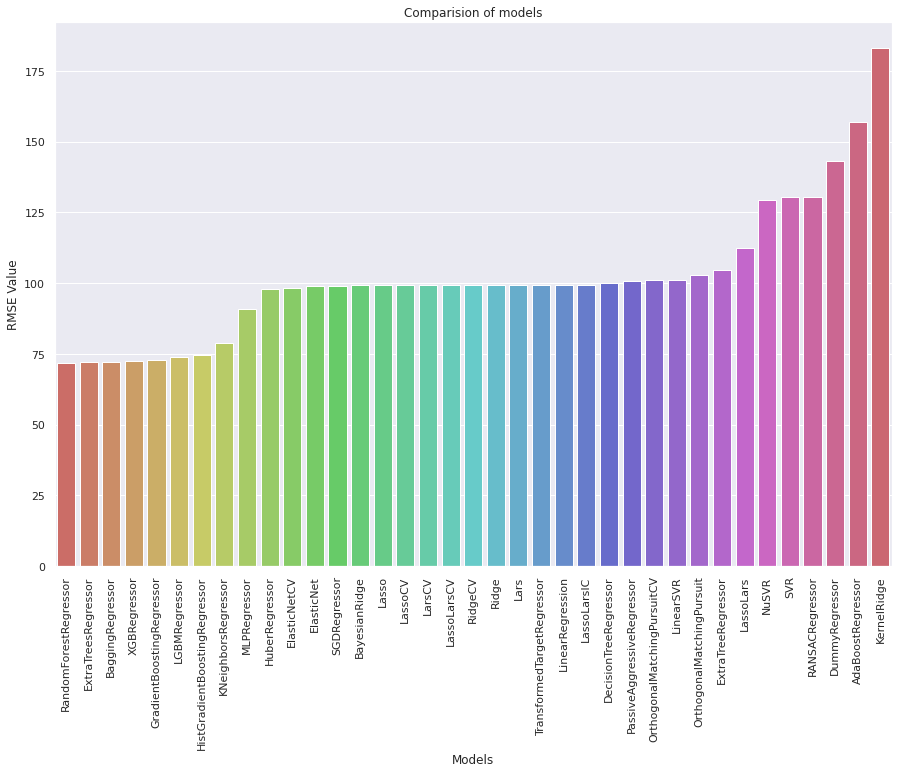

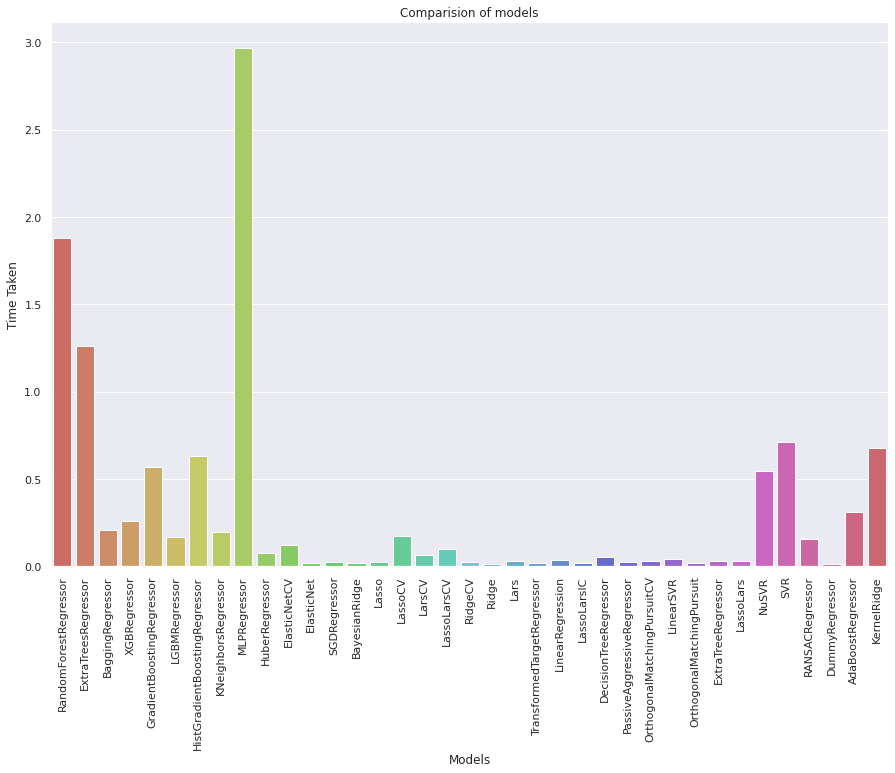

In [84]:
BarPlot('Model','R-Squared',models,xl="Models", yl="R-Squared Value", title="Comparision of models",z=90)
BarPlot('Model','RMSE',models,xl="Models", yl="RMSE Value", title="Comparision of models",z=90)
BarPlot('Model','Time Taken',models,xl="Models", yl="Time Taken", title="Comparision of models",z=90)

In [78]:
# As per the above plots, it is clear that the best model for this dataset is Random Forest Regression
# Hence, training a Random Forest Regression model, Calculate its prediction matrices and the use the model to predict the Testing dataset provided.

In [85]:
# Checking the X_new
# Descriptive statistics for each column
X_new.describe()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
count,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00,3466.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.98,-9.74,-4.90,-0.32,-0.92,-1.13,-1.59,-1.33,-0.53,-2.87,-2.72,-0.61,-1.96,-1.31,-1.28,-13.85,-2.54,-1.19,-0.22,-1.12,-1.19,-1.37
25%,-0.98,0.20,0.41,-0.32,-0.92,-0.72,-0.94,-1.20,-0.53,-0.44,-0.62,-0.61,-0.47,-0.36,-0.63,0.11,-0.71,-0.68,-0.22,-1.07,-1.19,-0.55
50%,-0.98,0.20,0.41,-0.31,-0.92,-0.31,-0.30,0.19,-0.53,-0.10,0.05,-0.61,-0.47,-0.36,-0.63,0.11,-0.16,-0.16,-0.13,-0.44,0.84,-0.55
75%,1.02,0.20,0.41,-0.27,1.08,0.51,0.77,0.60,-0.53,0.74,0.68,-0.06,-0.47,0.59,0.01,0.11,0.67,0.35,-0.13,1.00,0.84,1.09
max,1.02,0.20,0.41,7.22,1.08,9.91,1.85,2.13,3.58,2.41,3.24,7.56,9.94,6.30,11.59,0.11,5.06,6.18,31.00,2.32,0.84,2.73


In [97]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [104]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39.53223557692307
Mean Squared Error: 5179.497924062501
Root Mean Squared Error: 71.96872879287574


In [110]:
# Now predicting the given testing dataset
test_etl = ETL("price_test.csv",False)
Val = test_etl.Load()
Val.head(10)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,0,90,3,1,1,4,1,9,0,47.58,-122.32,2,1.00,2,2,4,24,85.00,3,300,1,1
1,1,86,1,1,0,4,8,9,0,47.71,-122.30,1,1.00,1,2,4,27,40.00,2,1125,1,1
2,1,100,3,1,1,2,10,1,0,47.70,-122.34,1,1.00,1,1,4,24,150.00,5,120,0,3
3,1,100,3,2,1,2,6,1,0,47.61,-122.35,1,1.00,1,1,4,34,75.00,1,30,0,3
4,0,100,3,1,0,2,11,11,1,47.69,-122.31,1,1.00,1,1,4,22,0.00,1,3,0,0
5,0,100,3,7,0,6,12,18,0,47.64,-122.34,6,1.00,2,3,4,51,77.00,1,28,0,3
6,1,100,3,2,1,4,10,11,0,47.70,-122.32,1,1.00,1,1,4,24,30.00,2,1125,0,0
7,0,99,3,81,0,6,6,7,0,47.61,-122.35,6,1.00,2,3,4,25,135.00,1,365,1,4
8,1,100,3,7,1,8,11,11,0,47.66,-122.35,1,2.50,3,4,4,30,99.00,2,1124,0,1
9,0,100,3,2,1,5,8,11,1,47.71,-122.28,2,1.50,1,3,4,19,15.00,1,93,1,1


In [111]:
training_val = Standard_convert(Val)
training_val.head(10)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,-0.98,-0.71,0.41,-0.31,1.03,0.12,-1.35,0.25,-0.51,-1.05,0.56,-0.04,-0.48,0.64,0.05,0.10,-0.43,0.24,-0.04,-0.53,0.91,-0.54
1,1.02,-1.08,-2.89,-0.31,-0.97,0.12,0.14,0.25,-0.51,1.94,1.01,-0.64,-0.48,-0.38,0.05,0.10,-0.16,-0.51,-0.18,0.90,0.91,-0.54
2,1.02,0.22,0.41,-0.31,1.03,-0.75,0.56,-1.22,-0.51,1.61,-0.34,-0.64,-0.48,-0.38,-0.65,0.10,-0.43,1.32,0.24,-0.84,-1.10,1.12
3,1.02,0.22,0.41,-0.31,1.03,-0.75,-0.29,-1.22,-0.51,-0.25,-0.49,-0.64,-0.48,-0.38,-0.65,0.10,0.47,0.07,-0.32,-1.00,-1.10,1.12
4,-0.98,0.22,0.41,-0.31,-0.97,-0.75,0.77,0.62,1.67,1.40,0.65,-0.64,-0.48,-0.38,-0.65,0.10,-0.61,-1.18,-0.32,-1.05,-1.10,-1.38
5,-0.98,0.22,0.41,-0.28,-0.97,1.00,0.99,1.90,-0.51,0.35,-0.27,2.38,-0.48,0.64,0.75,0.10,2.01,0.11,-0.32,-1.00,-1.10,1.12
6,1.02,0.22,0.41,-0.31,1.03,0.12,0.56,0.62,-0.51,1.66,0.56,-0.64,-0.48,-0.38,-0.65,0.10,-0.43,-0.68,-0.18,0.90,-1.10,-1.38
7,-0.98,0.13,0.41,0.12,-0.97,1.00,-0.29,-0.12,-0.51,-0.21,-0.46,2.38,-0.48,0.64,0.75,0.10,-0.34,1.07,-0.32,-0.42,0.91,1.95
8,1.02,0.22,0.41,-0.28,1.03,1.87,0.77,0.62,-0.51,0.77,-0.44,-0.64,2.18,1.66,1.44,0.10,0.11,0.47,-0.18,0.90,-1.10,-0.54
9,-0.98,0.22,0.41,-0.31,1.03,0.56,0.14,0.62,1.67,1.87,1.72,-0.04,0.41,-0.38,0.75,0.10,-0.89,-0.93,-0.32,-0.89,0.91,-0.54


In [117]:
Prediction_Result = regressor.predict(training_val)
Prediction_Result = pd.DataFrame(Prediction_Result,columns=['Result'])
Prediction_Result.to_csv("Prediction_Result.csv")
Prediction_Result.head(10)

,Result
0,151.21
1,84.61
2,102.18
3,126.22
4,56.95
5,307.58
6,97.39
7,205.51
8,273.81
9,63.31
